In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import resample
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score,classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold,cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest , f_classif
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("C:\\Users\\adil2\\Downloads\\Micro-Credit-Project\\Micro Credit Project\\Data file.csv")

In [3]:
df.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


In [4]:
df.shape

(209593, 37)

In [5]:
df.isna().sum()

Unnamed: 0              0
label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            209593 non-null  int64  
 1   label                 209593 non-null  int64  
 2   msisdn                209593 non-null  object 
 3   aon                   209593 non-null  float64
 4   daily_decr30          209593 non-null  float64
 5   daily_decr90          209593 non-null  float64
 6   rental30              209593 non-null  float64
 7   rental90              209593 non-null  float64
 8   last_rech_date_ma     209593 non-null  float64
 9   last_rech_date_da     209593 non-null  float64
 10  last_rech_amt_ma      209593 non-null  int64  
 11  cnt_ma_rech30         209593 non-null  int64  
 12  fr_ma_rech30          209593 non-null  float64
 13  sumamnt_ma_rech30     209593 non-null  float64
 14  medianamnt_ma_rech30  209593 non-null  float64
 15  

In [7]:
df.describe()

,Unnamed: 0,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,...,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000
mean,104797.000000,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,2064.452797,...,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485
std,60504.431823,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,2370.786034,...,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108
min,1.000000,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,52399.000000,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,770.000000,...,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,104797.000000,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,1539.000000,...,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667
75%,157195.000000,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,2309.000000,...,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000
max,209593.000000,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,...,50.000000,306.000000,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000


In [8]:
df.msisdn.value_counts()

47819I90840    7
04581I85330    7
42825I88688    6
71742I90843    6
87592I84456    6
              ..
81405I95204    1
64054I82738    1
40119I90841    1
88225I89232    1
57425I89233    1
Name: msisdn, Length: 186243, dtype: int64

In [9]:
df.pcircle.value_counts()

UPW    209593
Name: pcircle, dtype: int64

In [10]:
#Splitting the Date_of_Journey column into day,month and year
df[['Year','Month','Day']] = df['pdate'].str.split('-',expand = True)

In [11]:
#Removing Object columns
df = df.drop(columns = ['Unnamed: 0','pdate','Year','pcircle','msisdn'])

In [12]:
df.shape

(209593, 35)

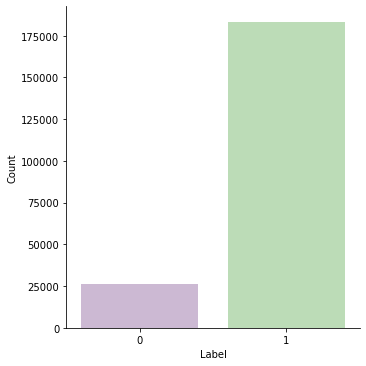

In [13]:
pl=sns.catplot(x="label",data=df,kind="count",palette="PRGn",alpha=1)
pl.set(xlabel="Label",ylabel="Count")
plt.show()

In [14]:
df.label.value_counts()

1    183431
0     26162
Name: label, dtype: int64

In [15]:
df_maj = df[(df['label'] == 0)]
df_min = df[(df['label'] == 1)]
df_min_sample = resample(df_min,replace = True,n_samples = 183431,random_state = 42)
df_un = pd.concat([df_min_sample,df_maj])

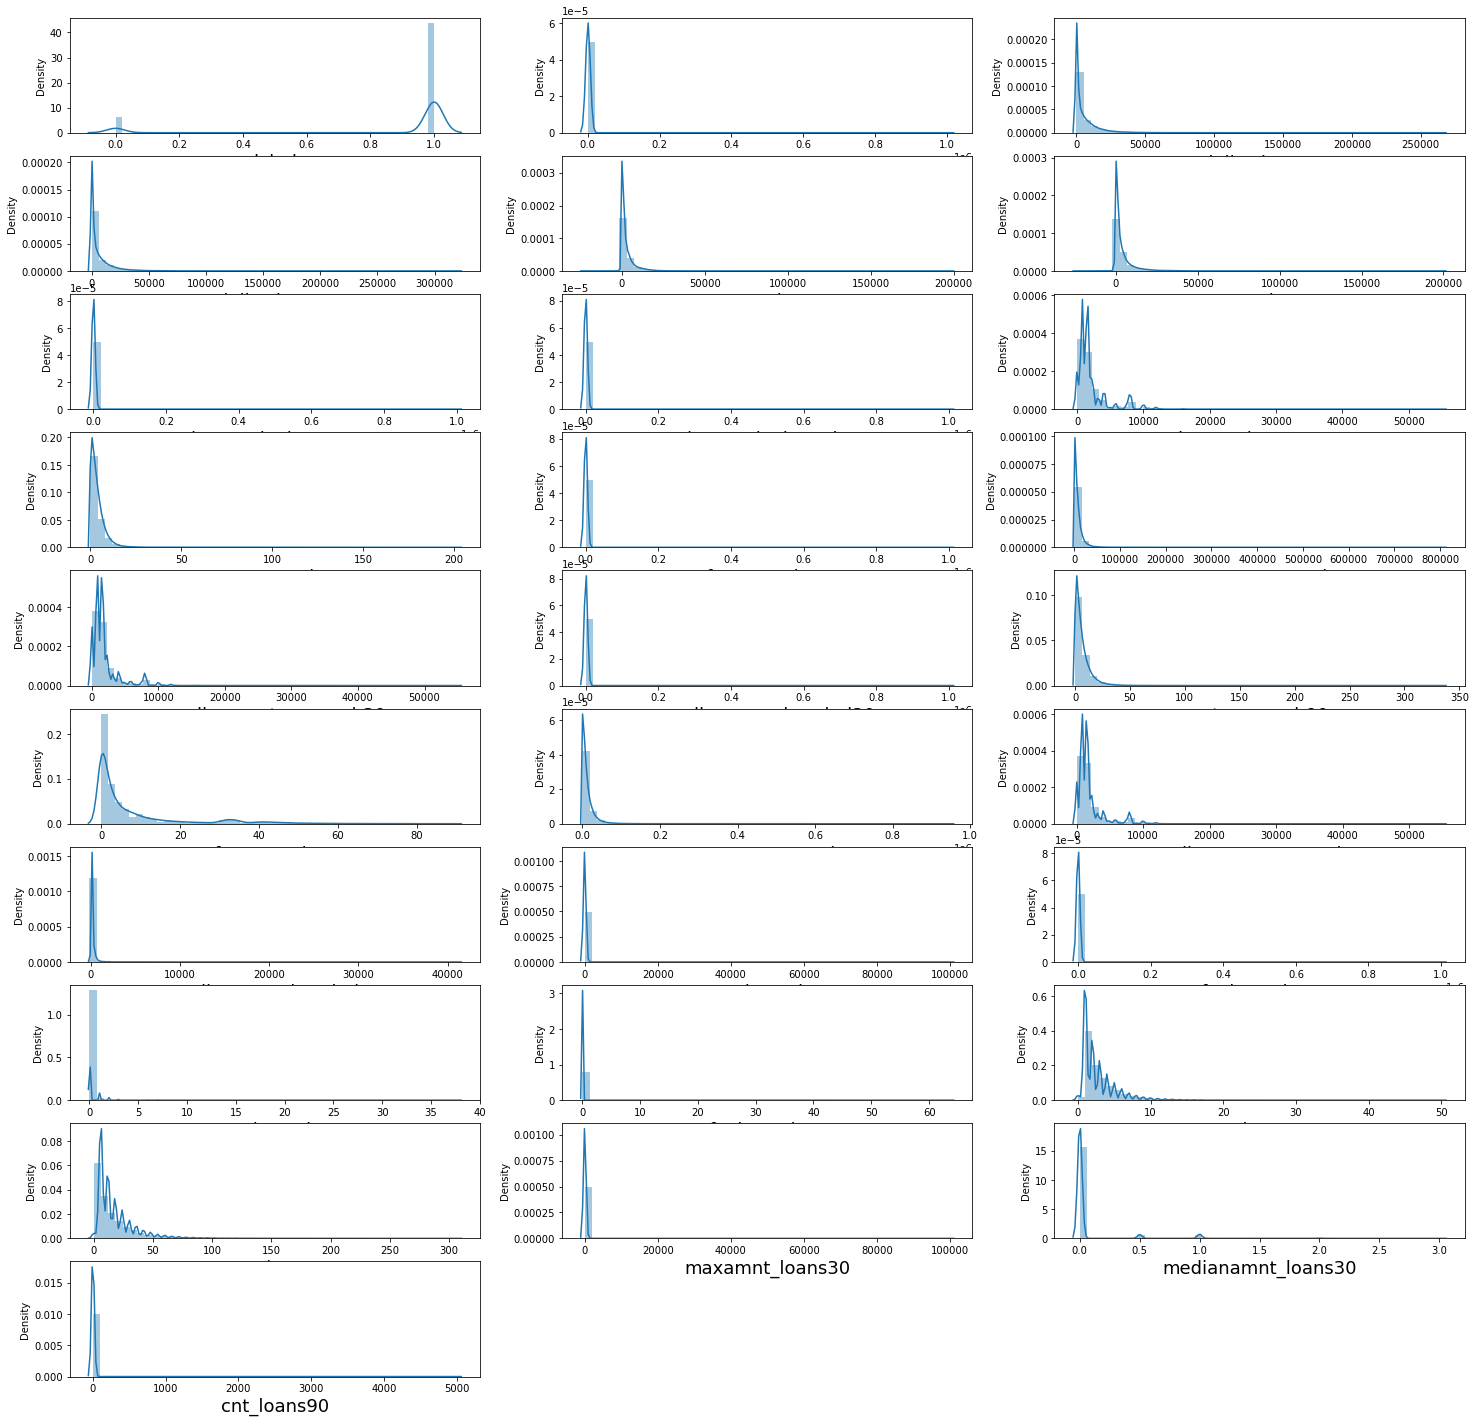

In [16]:
# plotting the distribution plot for checking the dataset Normal Distribution
plt.figure(figsize = (25,25))
pl = 1

for column in df:
    if pl<=28:
        ax = plt.subplot(10,3,pl)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize = 18)
    pl+=1
plt.show()

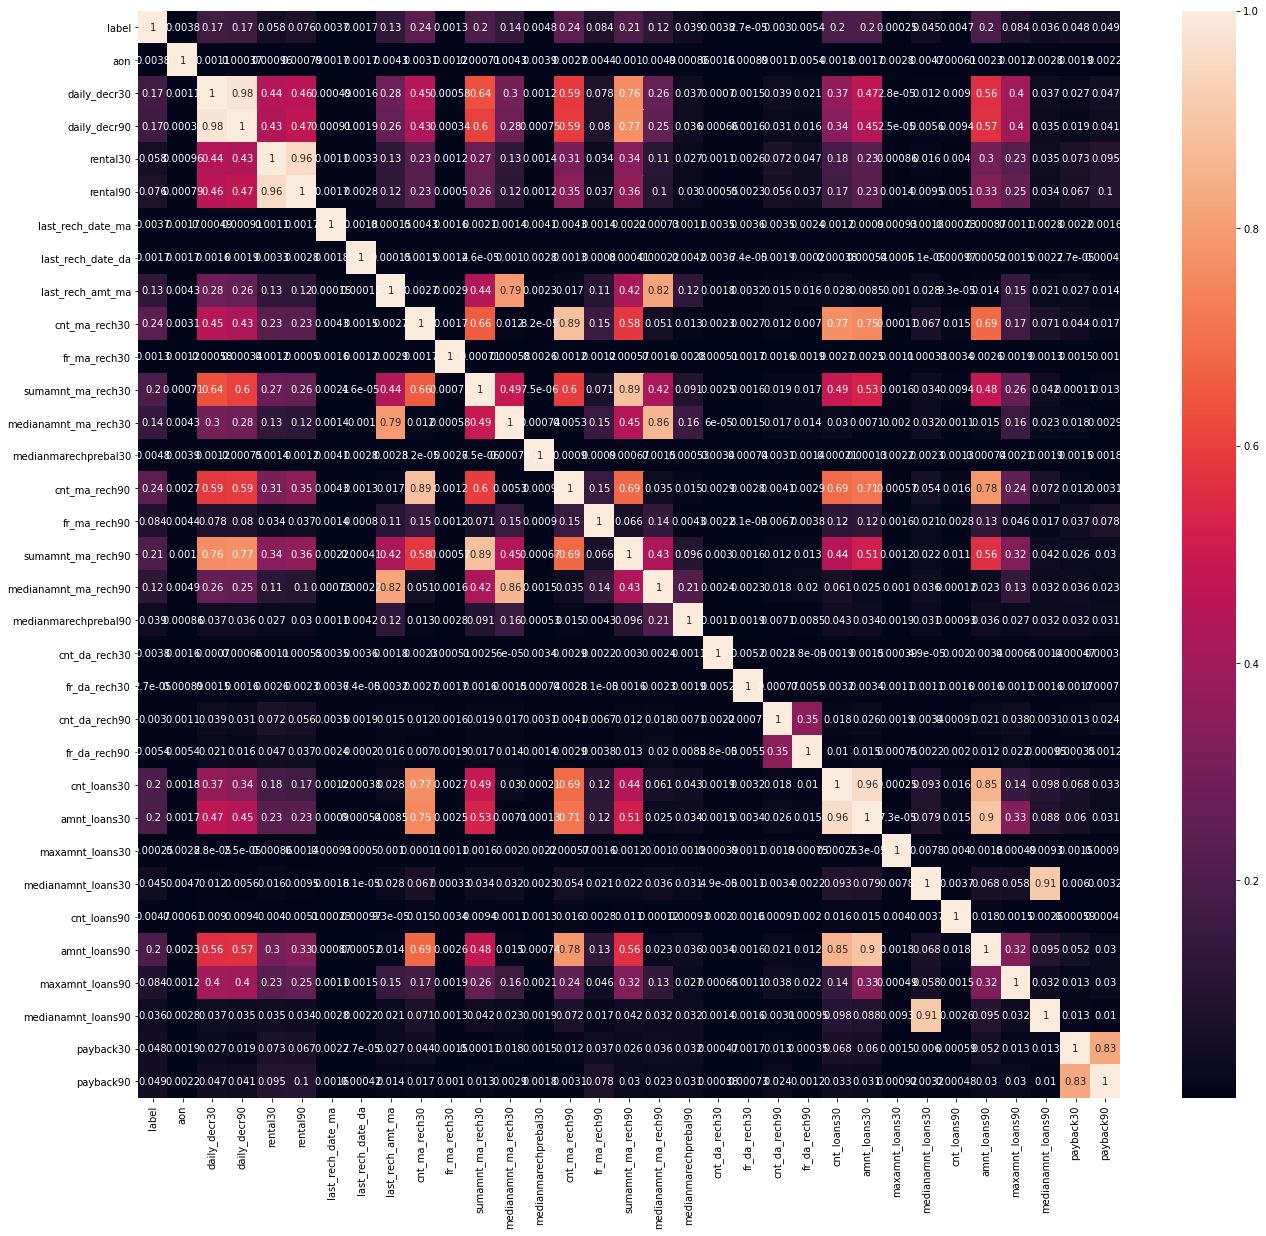

In [17]:
#Checking the co_relation between each columns 
df_corr = df.corr().abs()
plt.figure(figsize = (22,20))
sns.heatmap(df_corr,annot = True,annot_kws = {'size':10})
plt.show()

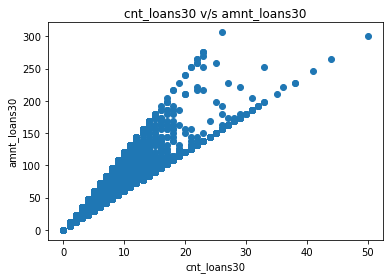

In [18]:
## plotting scatter plot to confirm co_relation between Education and Education_num
plt.scatter(df.cnt_loans30,df.amnt_loans30)
plt.xlabel('cnt_loans30')
plt.ylabel('amnt_loans30')
plt.title('cnt_loans30 v/s amnt_loans30')
plt.show()

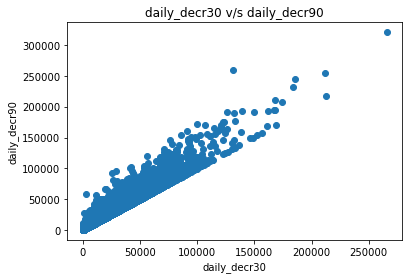

In [19]:
## plotting scatter plot to confirm co_relation between Education and Education_num
plt.scatter(df.daily_decr30,df.daily_decr90)
plt.xlabel('daily_decr30')
plt.ylabel('daily_decr90')
plt.title('daily_decr30 v/s daily_decr90')
plt.show()

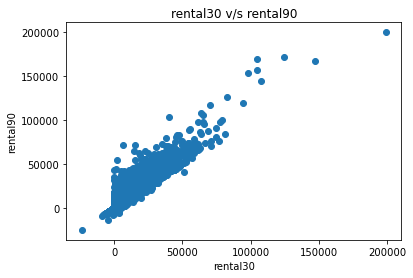

In [20]:
## plotting scatter plot to confirm co_relation between Education and Education_num
plt.scatter(df.rental30,df.rental90)
plt.xlabel('rental30')
plt.ylabel('rental90')
plt.title('rental30 v/s rental90')
plt.show()

In [21]:
df = df.drop(columns = ['daily_decr30','rental30','cnt_loans30'])

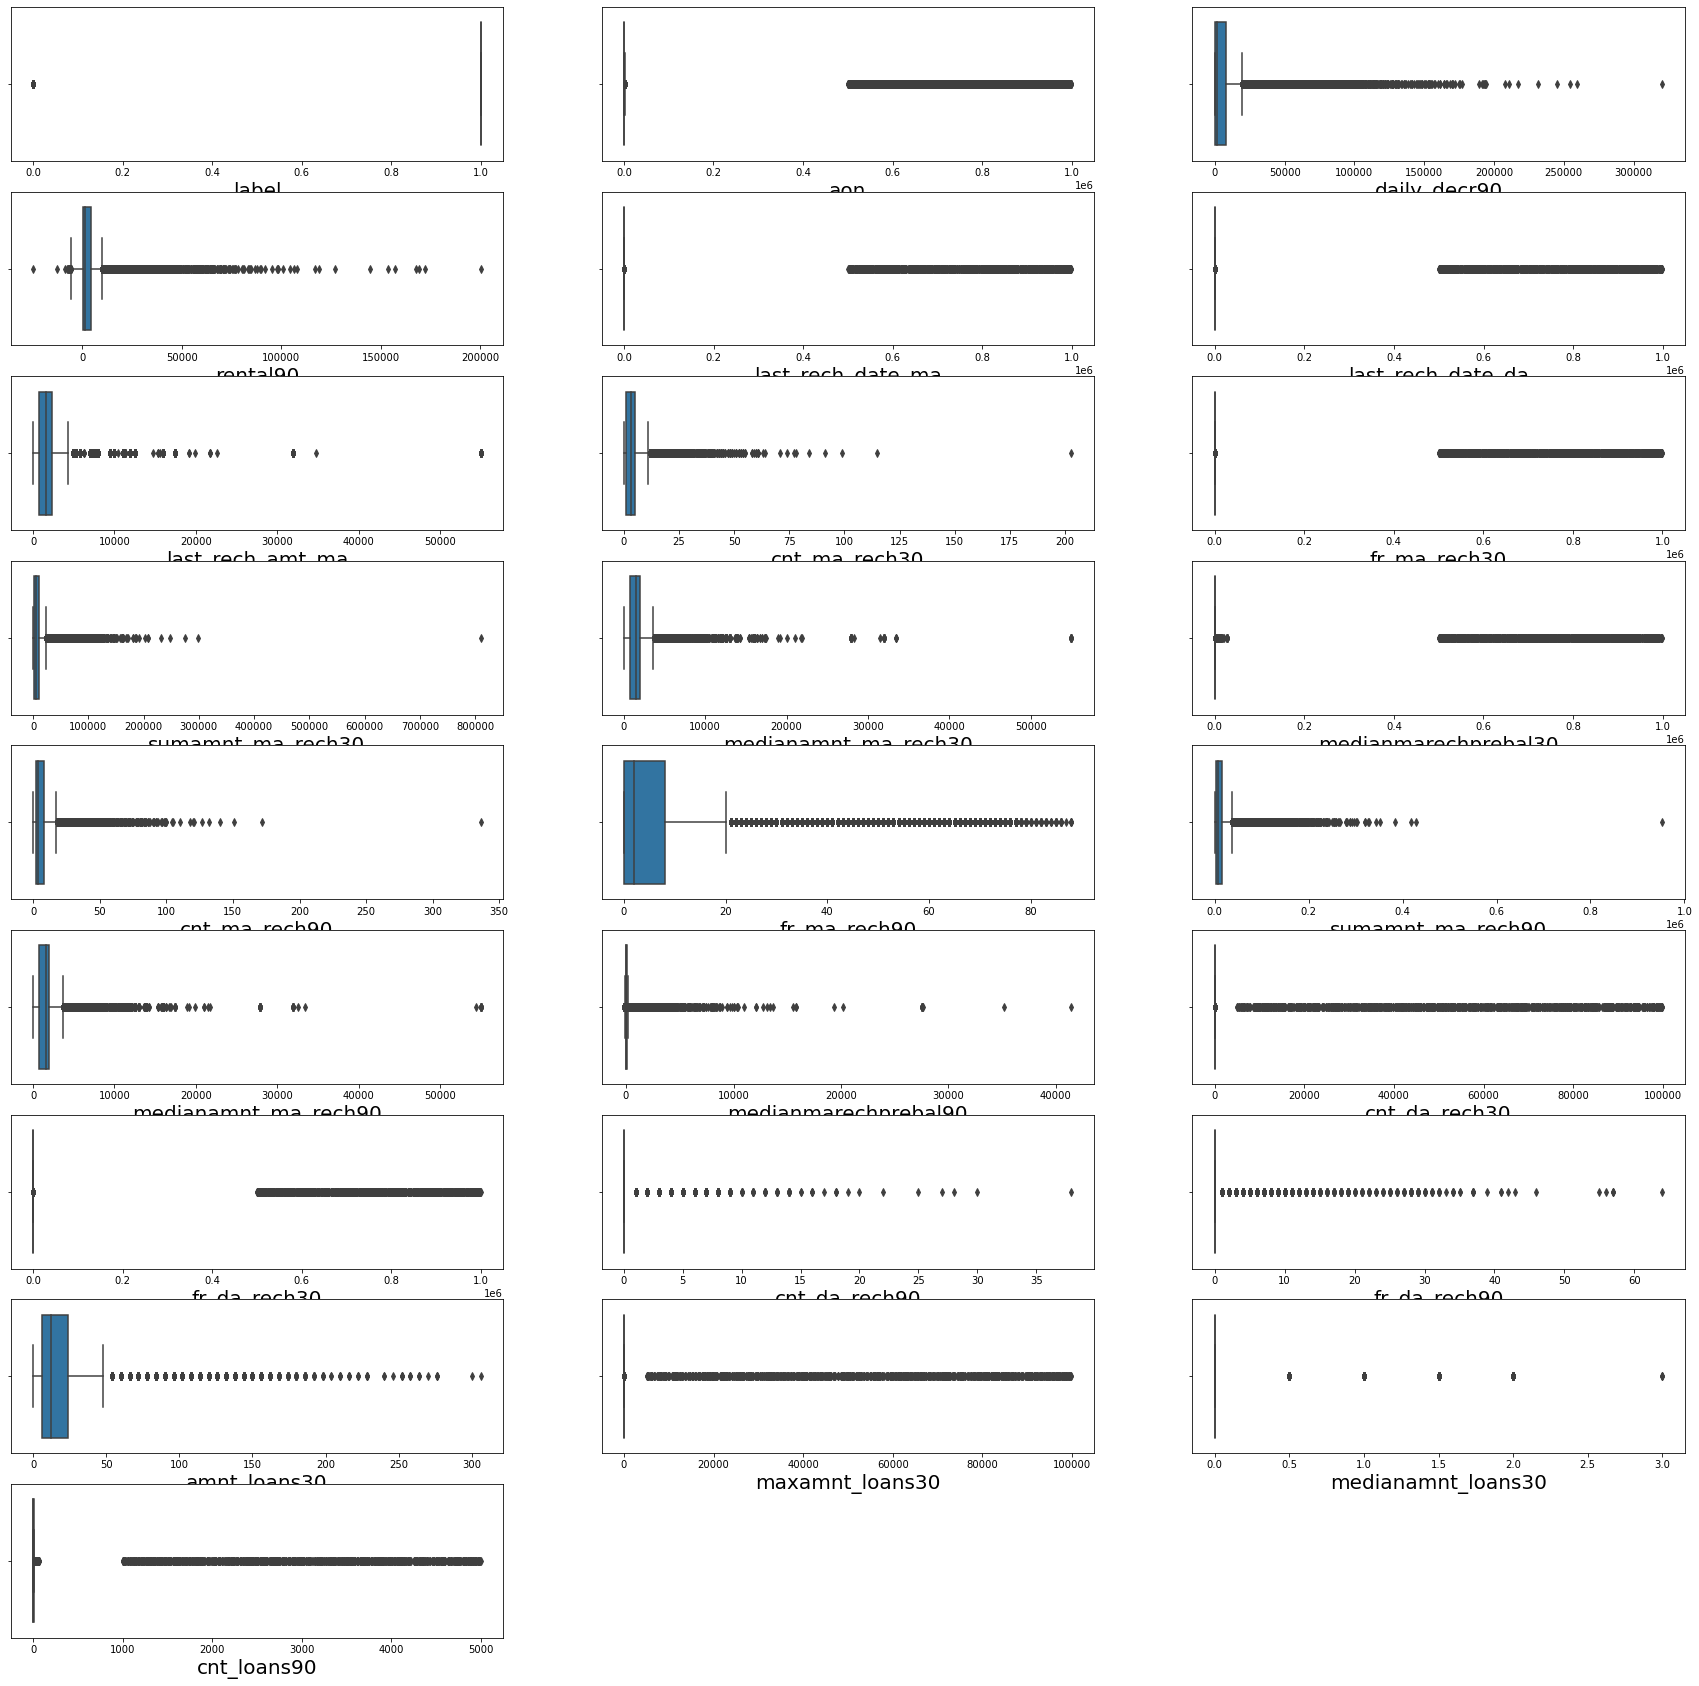

In [22]:
## plotting the boxplot for checking the outliers in the dataset
plt.figure(figsize = (30,30))
pl = 1

for column in df:
    if pl<=25:
        ax = plt.subplot(9,3,pl)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize = 20)
    pl+=1
plt.show()

In [23]:
##finding the outliers 
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3- q1
iqr

label                       0.000
aon                       736.000
daily_decr90             7760.098
rental90                 3901.530
last_rech_date_ma           6.000
last_rech_date_da           0.000
last_rech_amt_ma         1539.000
cnt_ma_rech30               4.000
fr_ma_rech30                6.000
sumamnt_ma_rech30        8470.000
medianamnt_ma_rech30     1154.000
medianmarechprebal30       72.000
cnt_ma_rech90               6.000
fr_ma_rech90                8.000
sumamnt_ma_rech90       13683.000
medianamnt_ma_rech90     1151.000
medianmarechprebal90       64.710
cnt_da_rech30               0.000
fr_da_rech30                0.000
cnt_da_rech90               0.000
fr_da_rech90                0.000
amnt_loans30               18.000
maxamnt_loans30             0.000
medianamnt_loans30          0.000
cnt_loans90                 4.000
amnt_loans90               24.000
maxamnt_loans90             0.000
medianamnt_loans90          0.000
payback30                   3.750
payback90     

In [24]:
# Removing outliers in the Runs columns
su = (q3.sumamnt_ma_rech90 + (1.5 * iqr.sumamnt_ma_rech90))
su
index = np.where(df['sumamnt_ma_rech90']>su)
index

df = df.drop(df.index[index])
df.shape

df.reset_index()

,index,label,aon,daily_decr90,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,Month,Day
0,0,0,272.0,3065.150000,260.13,2.0,0.0,1539,2,21.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,07,20
1,1,1,712.0,12124.750000,3691.26,20.0,0.0,5787,1,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,08,10
2,2,1,535.0,1398.000000,900.13,3.0,0.0,1539,1,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,08,19
3,3,1,241.0,21.228000,159.42,41.0,0.0,947,0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,06,06
4,4,1,947.0,150.619333,1098.90,4.0,0.0,2309,7,2.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,06,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195634,209588,1,404.0,151.872333,1089.19,1.0,0.0,4048,3,2.0,...,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,06,17
195635,209589,1,1075.0,36.936000,1728.36,4.0,0.0,773,4,1.0,...,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,06,12
195636,209590,1,1013.0,11904.350000,8893.20,3.0,0.0,1539,5,8.0,...,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,07,29
195637,209591,1,1732.0,12574.370000,984.58,2.0,38.0,773,5,4.0,...,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,07,25


In [25]:
# Removing outliers in the Runs columns
suma = (q3.sumamnt_ma_rech30 + (1.5 * iqr.sumamnt_ma_rech30))
suma
index = np.where(df['sumamnt_ma_rech30']>suma)
index

df = df.drop(df.index[index])
df.shape

df.reset_index()

,index,label,aon,daily_decr90,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,Month,Day
0,0,0,272.0,3065.150000,260.13,2.0,0.0,1539,2,21.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,07,20
1,1,1,712.0,12124.750000,3691.26,20.0,0.0,5787,1,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,08,10
2,2,1,535.0,1398.000000,900.13,3.0,0.0,1539,1,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,08,19
3,3,1,241.0,21.228000,159.42,41.0,0.0,947,0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,06,06
4,4,1,947.0,150.619333,1098.90,4.0,0.0,2309,7,2.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,06,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191574,209588,1,404.0,151.872333,1089.19,1.0,0.0,4048,3,2.0,...,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,06,17
191575,209589,1,1075.0,36.936000,1728.36,4.0,0.0,773,4,1.0,...,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,06,12
191576,209590,1,1013.0,11904.350000,8893.20,3.0,0.0,1539,5,8.0,...,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,07,29
191577,209591,1,1732.0,12574.370000,984.58,2.0,38.0,773,5,4.0,...,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,07,25


In [26]:
# Removing outliers in the Runs columns
dd = (q3.daily_decr90 + (1.5 * iqr.daily_decr90))
dd
index = np.where(df['daily_decr90']>dd)
index

df = df.drop(df.index[index])
df.shape

df.reset_index()

,index,label,aon,daily_decr90,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,Month,Day
0,0,0,272.0,3065.150000,260.13,2.0,0.0,1539,2,21.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,07,20
1,1,1,712.0,12124.750000,3691.26,20.0,0.0,5787,1,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,08,10
2,2,1,535.0,1398.000000,900.13,3.0,0.0,1539,1,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,08,19
3,3,1,241.0,21.228000,159.42,41.0,0.0,947,0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,06,06
4,4,1,947.0,150.619333,1098.90,4.0,0.0,2309,7,2.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,06,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183706,209588,1,404.0,151.872333,1089.19,1.0,0.0,4048,3,2.0,...,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,06,17
183707,209589,1,1075.0,36.936000,1728.36,4.0,0.0,773,4,1.0,...,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,06,12
183708,209590,1,1013.0,11904.350000,8893.20,3.0,0.0,1539,5,8.0,...,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,07,29
183709,209591,1,1732.0,12574.370000,984.58,2.0,38.0,773,5,4.0,...,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,07,25


In [27]:
x = df.drop(columns = 'label')
y = df['label']

In [28]:
x.shape

(183711, 31)

In [29]:
y.shape

(183711,)

In [30]:
#Selecting features using SelectKBest feature selection
best_features = SelectKBest(score_func = f_classif, k=25)
fit = best_features.fit(x,y)
data_scores = pd.DataFrame(fit.scores_)
data_columns = pd.DataFrame(x.columns)

feature_scores =pd.concat([data_columns , data_scores], axis = 1)
feature_scores.columns = ['feature_Name','Score']
print(feature_scores.nlargest(25,'Score'))

            feature_Name         Score
13     sumamnt_ma_rech90  15571.951859
8      sumamnt_ma_rech30  14579.970430
11         cnt_ma_rech90  14030.765857
6          cnt_ma_rech30  13408.524382
24          amnt_loans90   8988.295103
20          amnt_loans30   8348.484330
1           daily_decr90   7081.102460
9   medianamnt_ma_rech30   3619.070055
29                 Month   3129.839737
5       last_rech_amt_ma   2989.164382
14  medianamnt_ma_rech90   2436.297222
12          fr_ma_rech90   1873.114493
15  medianmarechprebal90    674.881468
25       maxamnt_loans90    571.985988
28             payback90    547.728356
27             payback30    531.978303
22    medianamnt_loans30    453.197532
26    medianamnt_loans90    325.723014
2               rental90    323.212817
30                   Day     15.257365
19          fr_da_rech90      8.977712
10  medianmarechprebal30      4.320737
16         cnt_da_rech30      3.226837
0                    aon      2.978006
3      last_rech_date_ma 

In [31]:
x_new = x[['sumamnt_ma_rech90','sumamnt_ma_rech30','cnt_ma_rech90','cnt_ma_rech30','amnt_loans90','amnt_loans30','daily_decr90','medianamnt_ma_rech30',
          'Month','last_rech_amt_ma','medianamnt_ma_rech90','fr_ma_rech90','medianmarechprebal90','maxamnt_loans90','payback90','payback30',
          'medianamnt_loans30','medianamnt_loans90','rental90','Day','fr_da_rech90','medianmarechprebal30','cnt_da_rech30','aon','last_rech_date_ma']]

In [32]:
x_new.shape

(183711, 25)

In [33]:
## Transforming the dataset in standard scaler form
sc = StandardScaler()
x_sc = sc.fit_transform(x_new)

In [34]:
#splitting the dataset into train and testing data
x_new_train,x_new_test,y_train,y_test = train_test_split(x_sc,y,test_size = 0.25,random_state = 365)

In [35]:
# Using KNeighborsClasssifer Algorithm for classification problem
knn = KNeighborsClassifier()

In [36]:
# Applying the KNNAlgorithm into training data
knn.fit(x_new_train,y_train)

KNeighborsClassifier()

In [37]:
#Predicting the value 
y_pred = knn.predict(x_new_test)
y_pred

array([1, 0, 1, ..., 0, 1, 1], dtype=int64)

In [38]:
#confusion_matrix
cfm = confusion_matrix(y_test,y_pred)
cfm

array([[ 2825,  3709],
       [ 1990, 37404]], dtype=int64)

In [39]:
#classification)report
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.59      0.43      0.50      6534
           1       0.91      0.95      0.93     39394

    accuracy                           0.88     45928
   macro avg       0.75      0.69      0.71     45928
weighted avg       0.86      0.88      0.87     45928



In [40]:
accuracy_score(y_test,y_pred)

0.8759144748301689

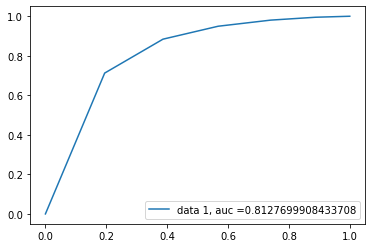

In [41]:
yr = knn.predict_proba(x_new_test)[::,1]
fpr,tpr,_ = metrics.roc_curve(y_test,yr)
auc = metrics.roc_auc_score(y_test,yr)
plt.plot(fpr,tpr,label = 'data 1, auc =' +str(auc))
plt.legend(loc = 4)
plt.show()

In [42]:
# Applying DecisonTreeClassifier Algorithm for classification problem
dtc = DecisionTreeClassifier()
dtc.fit(x_new_train,y_train)

DecisionTreeClassifier()

In [43]:
# Applying the Algorithm into training data
dtc.score(x_new_train,y_train)

0.9999782266317325

In [44]:
# predicting the values
y_pred = dtc.predict(x_new_test)
y_pred

array([1, 0, 1, ..., 0, 0, 1], dtype=int64)

In [45]:
#Accuracy score of DecisionTreeClassifier
accuracy_score(y_test,y_pred)

0.8709066364744817

In [46]:
#confusion_matrix
cfm = confusion_matrix(y_test,y_pred)
cfm

array([[ 3778,  2756],
       [ 3173, 36221]], dtype=int64)

In [47]:
#classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.54      0.58      0.56      6534
           1       0.93      0.92      0.92     39394

    accuracy                           0.87     45928
   macro avg       0.74      0.75      0.74     45928
weighted avg       0.87      0.87      0.87     45928



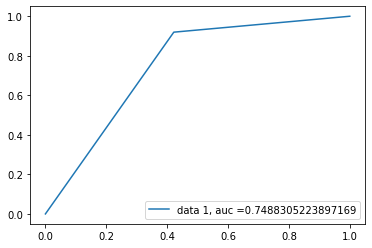

In [48]:
yr = dtc.predict_proba(x_new_test)[::,1]
fpr,tpr,_ = metrics.roc_curve(y_test,yr)
auc = metrics.roc_auc_score(y_test,yr)
plt.plot(fpr,tpr,label = 'data 1, auc =' +str(auc))
plt.legend(loc = 4)
plt.show()